<a href="https://colab.research.google.com/github/saraalbagory/ml-project/blob/svmNewBranch/alphabet_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download the dataSet

In [180]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sachinpatel21/az-handwritten-alphabets-in-csv-format")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Menna\.cache\kagglehub\datasets\sachinpatel21\az-handwritten-alphabets-in-csv-format\versions\5


read the data from the downloaded dataset


In [181]:
import pandas as pd

data = pd.read_csv(path + "/A_Z Handwritten Data.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


Find the number of classes.

The ord function returns the Unicode (ASCII) code point of a character.


In [182]:
import numpy as np

#get the last column
numericLabels =data.iloc[:,0].unique()

# for i in numericLabels:
#   print(f"Label: {chr(i + ord('A'))}")
# print(numericLabels)
# convert the number to labels
uniqueLabels = np.array([chr(i + ord('A')) for i in numericLabels])
print(uniqueLabels)
length=numericLabels.size
print(f"the number of classes: {length}")

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
the number of classes: 26


show their distribution

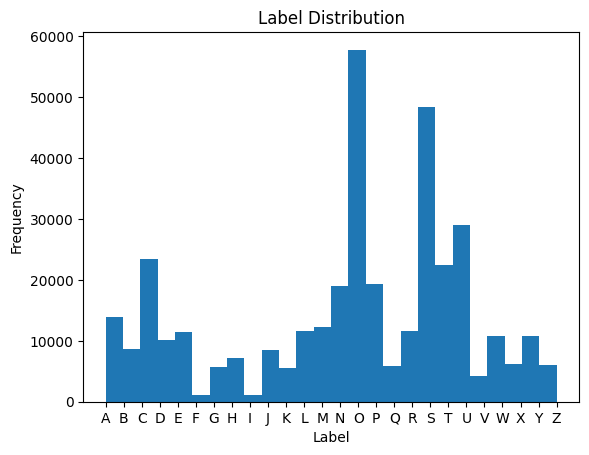

In [183]:
import matplotlib.pyplot as plt

numericLabels =data.iloc[:,0]
labels = np.array([chr(i + ord('A')) for i in numericLabels])
plt.hist(labels, bins=length)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


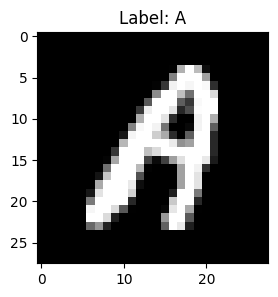

In [184]:
import matplotlib.pyplot as plt

data.info()
first_row = data.iloc[0]
label = first_row.iloc[0]
image_data = first_row.iloc[1:].values

# Reshape the pixel data to 28x28 matrix format
image = image_data.reshape((28, 28))

# Display the image
plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')
plt.title(f"Label: {chr(label + ord('A'))}")  # Convert label number to letter
plt.show()

Normalize the images


In [185]:
image_data=data.iloc[:,1:]
normalized_image_data=image_data/255
print(normalized_image_data)
normalized_image_data.describe()

        0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.10  ...  0.639  0.640  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
372445  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372446  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372447  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372448  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372449  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   

        0.641  0.642  0.643  0.644  0.6

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,3.724500e+05,3.724500e+05
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000006,0.000006,0.000004,0.000004,0.000003,0.000002,0.000002,0.000003,9.370912e-07,4.211646e-08
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001925,0.002029,0.001652,0.001644,0.001512,0.001254,0.000819,0.001315,5.288302e-04,2.570312e-05
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988235,0.886275,0.898039,0.894118,0.921569,0.760784,0.403922,0.776471,3.215686e-01,1.568627e-02


In [ ]:
# import tensorflow as tf
# normalized_features2=tf.keras.utils.normalize(features,axis=1)

Reshape the Flattened Vectors to Reconstruct and Display the Images

In [186]:
# reshaped_images = []
# for _, row in normalized_image_data.iterrows():  # Loop through each row
#     reshaped_image = row.values.reshape(28, 28)
#     reshaped_images.append(reshaped_image)
# reshaped_images = np.array(reshaped_images)
reshaped_images = normalized_image_data.values.reshape(-1, 28, 28)
# for i in range(10):
#   plt.figure(figsize=(1,1))
#   plt.imshow(reshaped_images[i], cmap='gray')
#   plt.title(f"label : {labels[i]}")
#   plt.show()

In [187]:
from sklearn.model_selection import train_test_split

numericLabels=data.iloc[:,0]
image_train, image_test, label_train, label_test=train_test_split(reshaped_images,numericLabels,test_size=0.2,random_state=42)
image_train_2d = image_train.reshape(image_train.shape[0], -1)
image_test_2d = image_test.reshape(image_test.shape[0], -1)

SVM Model part

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Split training data into training and validation sets
image_train_split, image_val_split, label_train_split, label_val_split = train_test_split(
    image_train_2d, label_train, test_size=0.2, random_state=42
)

# Use training data (80% of training set) to train SVM models
linear_svm = SVC(kernel='linear',  max_iter=1000, C=1, random_state=42)
linear_svm.fit(image_train_split, label_train_split)

rbf_svm = SVC(kernel='rbf', random_state=42,  max_iter=1000,C=1)
rbf_svm.fit(image_train_split, label_train_split)

from sklearn.metrics import confusion_matrix, classification_report, f1_score
# Evaluate models on the validation set
for name, model in [('Linear SVM', linear_svm), ('RBF SVM', rbf_svm)]:
    y_val_pred = model.predict(image_val_split)
    cm = confusion_matrix(label_val_split, y_val_pred)

    print(f"Confusion Matrix for {name} (Validation Set):")
    print(cm)
    print(f"\nClassification Report for {name} (Validation Set):")
    print(classification_report(label_val_split, y_val_pred))
    f1 = f1_score(label_val_split, y_val_pred, average='weighted')
    print(f"Average F1-Score for {name} (Validation Set): {f1:.4f}\n")


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
Confusion Matrix for Linear SVM (Validation Set):
[[1732   31    1    1    4    1    6  121    0    6    7    8   66   74
     1   31    5  161    1    8    7    1    6   20   20    0]
 [  35 1084   43   58   38    0   18    7    0   11    5    0    4    7
    25    6    1    2   20    1    9    0    0    5    3    9]
 [   1   41 3044    8  119    2   63    1    0   25   11  158    1    2
   138   18   25    3   58    3   83    0   17    2    3    3]
 [   3   40   19 1271    4    0    0    0    0   20    0    0    5    1
   142   53    2    0   12    0   10    0    4    1    1   12]
 [  21  137  177    4 1261   16   14    1    1    3   61   25    1   13
     4    5    8   55   14    1    7    0    7    5    3   19]
 [   1    0    0    0    1  179    0    0    0    0    0    0    0    0
     1    0    0    0    1    4    0    0    0    0    0    0]
 [  36   16   32   12   15    0  559    4    0    5    0    7    3    3
    15    1  121    1   40    1   14    0    8    0    1    1]
 [ 285   15    1    1    1    0    2  552    0    1    5    2   56  160
     0    8    1   14    0    2   17    1   25    2    8    0]
 [   0    0    0    0    0    0    0    0  162    1    1    0    0    0
     0    0    0    0    0    2    0    0    0    1    2    0]
 [   1    7    1   62   15    3    1    2  116  883    0    4    2    4
    14    3    2    0   58   32  105    0    8    1   53    8]
 [  36    0   13    0   22    0    0    8    0    0  682    8    3   14
     0    0    2   50    1    5    4    3    1   38    9    0]
 [   1    0   64    0   76    0    1    1    2    6    7 1678    0    1
     0    0    0    1    0    1    7    1    4    5    1    0]
 [ 166    5    4    2    2    0    2   58    0    0    2    0 1694   43
     2    2    0    6    0   11    0    0   12    0    2    2]
 [ 265    7   10   11   16    0    4  223    0    3   44   11  289 1554
     2    3    4   25    1    5   55   52  511    3    5    1]
 [  26  295 1415 1603   28    2   61    5    0   18    1    0   25  163
  5334   12  164    9   27    2   28    0    2    1    2    0]
 [  28    0    5   17   10   88    0    1    0    0    3    0    2    5
     4 2640    2   38    1  182    1    0    1    0   57    0]
 [  26    3   17    5    5    2  110    0    0    3    0    1    1    4
    38   28  649    9   25    4   14    0    0    0    0    1]
 [ 227   51   56    6  109    0    2   13    1    1  259    7   16   44
     0   98   43  799    1    4    2    5    3   34    7   12]
 [  13 1529   53  329  355    9  318    5  193 1161   11   23    9    6
    59    7  150    1 3476    6   16    0    2   15    8   10]
 [   8    1    0    0    1  140    1    0   47   42    5    0    9    2
     0  357    1    1    1 2856    0    0    0    2  101    0]
 [  48   12  189  272   47    0   33  125    0   25   30   62   25  334
   305    0   90   27   11    2 2662   17  285    2    7    7]
 [   0    0    0    0    1    3    0    2    0    0    8    0    0    1
     0    0    0    0    0    0   16  614    1    1    0    0]
 [  15    1    2    7   30    0    2   30    0    2    4   10   18  268
     0    0    1    2    1    0  158   17 1094    4    0    0]
 [  29    2    1    0    1    0    0    2    1    0   74    6    2    2
     0    2    0   10    1    1    4   24    3  803   27    2]
 [   4   12    0    4    1    1    0   44    0   53   11    0   14    1
     4   37    0    3    5  276    5   54    4  159 1000    0]
 [   4   57    8    8   45    0    0    0  118   41    1   17    4    2
     0    1    2    0    2    0   11    0    0   39    3  546]]

Classification Report for Linear SVM (Validation Set):
              precision    recall  f1-score   support

           0       0.58      0.75      0.65      2319
           1       0.32      0.78      0.46      1391
           2       0.59      0.79      0.68      3829
           3       0.35      0.79      0.48      1600
           4       0.57      0.68      0.62      1863
           5       0.40      0.96      0.57       187
           6       0.47      0.62      0.53       895
           7       0.46      0.48      0.47      1159
           8       0.25      0.96      0.40       169
           9       0.38      0.64      0.48      1385
          10       0.55      0.76      0.64       899
          11       0.83      0.90      0.86      1857
          12       0.75      0.84      0.79      2015
          13       0.57      0.50      0.53      3104
          14       0.88      0.58      0.70      9223
          15       0.80      0.86      0.83      3085
          16       0.51      0.69      0.59       945
          17       0.66      0.44      0.53      1800
          18       0.93      0.45      0.60      7764
          19       0.84      0.80      0.82      3575
          20       0.82      0.58      0.68      4617
          21       0.78      0.95      0.86       647
          22       0.55      0.66      0.60      1666
          23       0.70      0.81      0.75       997
          24       0.76      0.59      0.66      1692
          25       0.86      0.60      0.71       909

    accuracy                           0.65     59592
   macro avg       0.62      0.71      0.63     59592
weighted avg       0.72      0.65      0.66     59592

Average F1-Score for Linear SVM (Validation Set): 0.6585

Confusion Matrix for RBF SVM (Validation Set):
[[2284    2    0    1    2    0    0    3    0    0    1    4    5    1
     0    2    0    7    0    1    2    0    3    1    0    0]
 [  11 1338    1    3    4    0    1    0    0    1    1    1    1    1
     7    4    1   11    4    0    1    0    0    0    0    0]
 [   0    2 3770    0    5    0    1    0    0    0    1   17    0    1
    19    0    2    0    0    2    5    0    1    0    2    1]
 [   1    6    0 1507    0    0    0    0    0    5    0    0    1    0
    70    5    1    0    1    0    1    0    2    0    0    0]
 [   2    2   18    1 1808    3    1    0    0    0    4    8    1    0
     2    4    0    6    1    0    1    0    0    0    1    0]
 [   0    0    0    0    0  182    0    0    0    0    0    0    0    0
     0    2    0    0    2    1    0    0    0    0    0    0]
 [   5    6    3    2    7    0  835    1    0    0    0    1    3    0
     5    1   12    0   13    0    1    0    0    0    0    0]
 [   9    1    0    0    1    0    0 1089    0    1    2    1    9   31
     0    1    0    1    1    0    4    1    1    0    6    0]
 [   0    0    0    0    0    0    0    0  160    1    0    0    0    0
     0    0    0    0    2    2    0    0    0    1    2    1]
 [   0    1    0    3    2    0    0    0    2 1326    0    0    1    0
     0    0    0    0   23   12   10    0    0    0    5    0]
 [   6    1    3    0    2    0    0    6    0    0  852    2    0    4
     0    0    0    8    0    0    1    0    0    9    5    0]
 [   2    0   15    1    0    0    0    0    0    6    1 1827    0    0
     0    0    0    1    0    1    1    0    0    1    1    0]
 [  17    0    0    0    0    0    1    8    0    0    1    0 1963   16
     0    0    0    6    0    0    2    0    1    0    0    0]
 [  12    0    0    2    0    0    0   13    0    3    8    1    7 3032
     1    2    1    3    0    0    6    0    9    3    0    1]
 [   2    3    2   26    1    0    0    0    0    1    1    0    2    1
  9165    5    3    0    1    2    8    0    0    0    0    0]
 [   4    0    2   11    1    0    0    1    0    1    0    0    0    2
     0 3047    0    4    0    3    0    0    1    1    7    0]
 [   1    1    3    5    1    0    6    0    0    0    0    0    1    2
    13   14  887    5    0    1    3    0    1    0    0    1]
 [  28    3    8    0    3    0    0    0    0    0   14    0    2    2
     0   11    1 1722    0    0    2    0    1    3    0    0]
 [   4    3    7    2    0    0    2    0    0   26    1    3    1    1
     4    4    1    2 7696    3    4    0    0    0    0    0]
 [   3    0    1    2    1    1    0    5    0    3    2    0    1    0
     0    8    0    0    0 3527    0    0    0    2   19    0]
 [   1    1    4    2    1    0    0    2    0    2    3    0    5    3
     8    0    3    3    0    1 4564    0   10    2    2    0]
 [   0    0    0    0    0    2    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    3  638    0    1    3    0]
 [   0    0    0    1    0    0    1    2    0    1    3    0    6   43
     0    0    0    0    0    0   14    0 1594    1    0    0]
 [   3    0    0    1    0    1    0    0    0    0   17    2    1    1
     0    0    1    2    0    1    3    2    1  950    8    3]
 [   3    1    0    3    0    0    0    2    0   15    3    0    0    0
     0    3    0    0    2    8    5    5    0    0 1642    0]
 [   0    2    0    2    1    0    0    0    0    0    0    5    2    1
     0    0    2    3    1    1    1    0    0    0    0  888]]

Classification Report for RBF SVM (Validation Set):
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2319
           1       0.97      0.96      0.97      1391
           2       0.98      0.98      0.98      3829
           3       0.96      0.94      0.95      1600
           4       0.98      0.97      0.98      1863
           5       0.96      0.97      0.97       187
           6       0.98      0.93      0.96       895
           7       0.96      0.94      0.95      1159
           8       0.99      0.95      0.97       169
           9       0.95      0.96      0.95      1385
          10       0.93      0.95      0.94       899
          11       0.98      0.98      0.98      1857
          12       0.98      0.97      0.97      2015
          13       0.96      0.98      0.97      3104
          14       0.99      0.99      0.99      9223
          15       0.98      0.99      0.98      3085
          16       0.97      0.94      0.95       945
          17       0.97      0.96      0.96      1800
          18       0.99      0.99      0.99      7764
          19       0.99      0.99      0.99      3575
          20       0.98      0.99      0.99      4617
          21       0.99      0.99      0.99       647
          22       0.98      0.96      0.97      1666
          23       0.97      0.95      0.96       997
          24       0.96      0.97      0.97      1692
          25       0.99      0.98      0.98       909

    accuracy                           0.98     59592
   macro avg       0.97      0.97      0.97     59592
weighted avg       0.98      0.98      0.98     59592

Average F1-Score for RBF SVM (Validation Set): 0.9782

NN and Logistic Regression Part

Split the training dataset into training and validation datasets

In [ ]:
image_train, image_val, label_train, label_val = train_test_split(image_train, label_train, test_size=0.2, random_state=42)

CNN Models

In [ ]:
from keras import utils as utils

label_train_onehot = utils.to_categorical(label_train, num_classes=26)
label_val_onehot = utils.to_categorical(label_val, num_classes=26)

reshape for cnn models

In [ ]:
image_train_4d_tf = image_train.reshape(-1, 28, 28, 1)
image_val_4d_tf = image_val.reshape(-1, 28, 28, 1)
image_test_4d_tf = image_test.reshape(-1, 28, 28, 1)

MODEL 1

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

model1 = (keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(26, activation='softmax')
]))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history1 = model1.fit(image_train_4d_tf, label_train_onehot, validation_data=(image_val_4d_tf, label_val_onehot), epochs=20,batch_size=512)

Epoch 1/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 53s 107ms/step - accuracy: 0.7784 - loss: 0.8235 - val_accuracy: 0.9604 - val_loss: 0.1503
Epoch 2/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9653 - loss: 0.1292 - val_accuracy: 0.9725 - val_loss: 0.1023
Epoch 3/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9764 - loss: 0.0885 - val_accuracy: 0.9761 - val_loss: 0.0874
Epoch 4/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9817 - loss: 0.0688 - val_accuracy: 0.9798 - val_loss: 0.0744
Epoch 5/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 45s 97ms/step - accuracy: 0.9843 - loss: 0.0579 - val_accuracy: 0.9801 - val_loss: 0.0722
Epoch 6/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.9869 - loss: 0.0494 - val_accuracy: 0.9825 - val_loss: 0.0662
Epoch 7/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9881 - loss: 0.0437 - val_accuracy: 0.9851 - val_loss: 0.0571
Epoch 8/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 43s 93ms/step - accuracy: 0.9907 - loss: 0.0352 -

In [ ]:
model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,088,080 (7.97 MB)

 Trainable params: 696,026 (2.66 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,392,054 (5.31 MB)

c:\Users\Menna\AppData\Local\Programs\Python\Python312\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


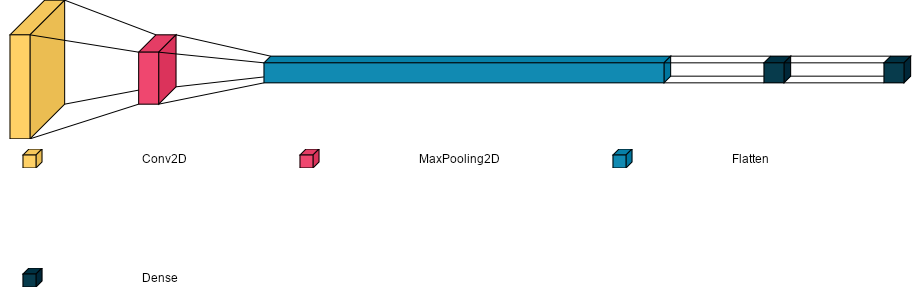

In [ ]:
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model1, legend=True, font=font,spacing=100)

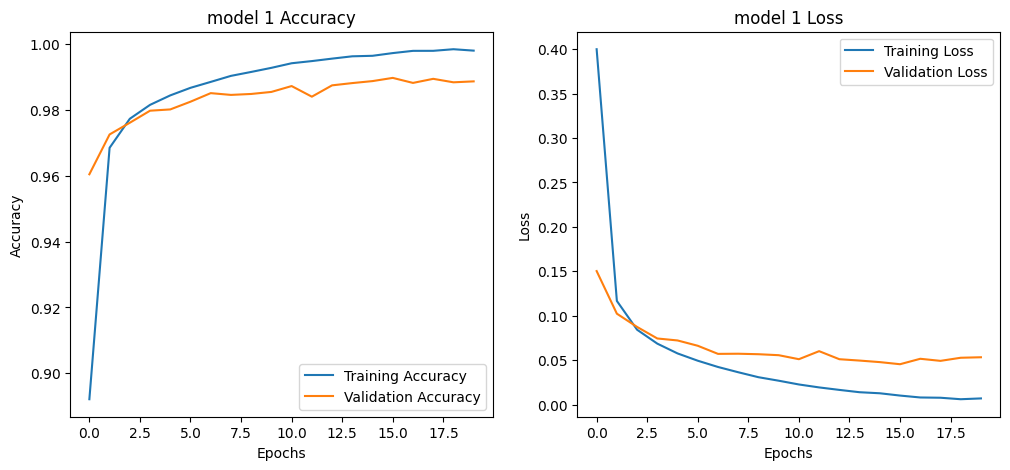

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('model 1 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('model 1 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

MODEL 2

In [ ]:
keras.Sequential([])
model2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='tanh'),
    keras.layers.Dense(26, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(image_train_4d_tf, label_train_onehot, validation_data=(image_val_4d_tf, label_val_onehot), epochs=20,batch_size=512)


Epoch 1/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 98s 199ms/step - accuracy: 0.7335 - loss: 0.9609 - val_accuracy: 0.9592 - val_loss: 0.1426
Epoch 2/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 79s 170ms/step - accuracy: 0.9664 - loss: 0.1216 - val_accuracy: 0.9727 - val_loss: 0.0937
Epoch 3/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 81s 173ms/step - accuracy: 0.9772 - loss: 0.0808 - val_accuracy: 0.9771 - val_loss: 0.0770
Epoch 4/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 80s 172ms/step - accuracy: 0.9827 - loss: 0.0632 - val_accuracy: 0.9800 - val_loss: 0.0690
Epoch 5/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 79s 170ms/step - accuracy: 0.9853 - loss: 0.0502 - val_accuracy: 0.9818 - val_loss: 0.0636
Epoch 6/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 78s 168ms/step - accuracy: 0.9880 - loss: 0.0418 - val_accuracy: 0.9822 - val_loss: 0.0617
Epoch 7/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 79s 169ms/step - accuracy: 0.9897 - loss: 0.0344 - val_accuracy: 0.9846 - val_loss: 0.0559
Epoch 8/20
466/466 ━━━━━━━━━━━━━━━━━━━━ 82s 176ms/step - accuracy: 0.9914 - loss: 0

In [ ]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 397,136 (1.51 MB)

 Trainable params: 132,378 (517.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 264,758 (1.01 MB)

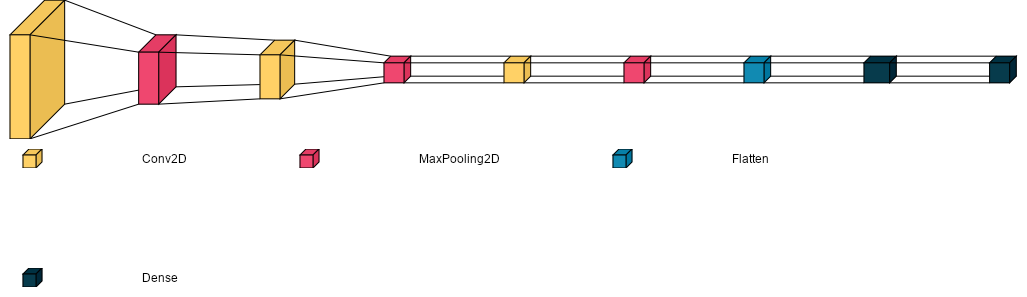

In [ ]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model2, legend=True, font=font,spacing=100)

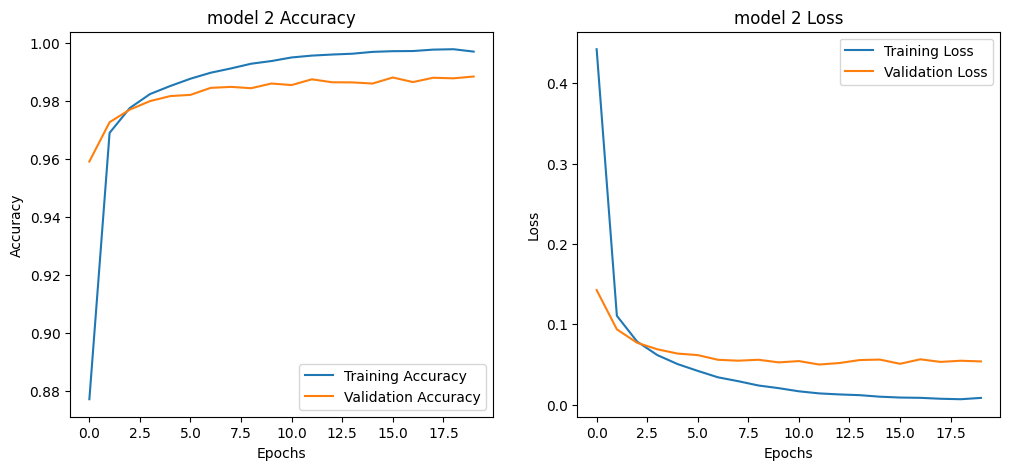

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('model 2 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('model 2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Saving the best Model

Both of the models gave the same results
But model 1 is slightly better than model 2 (gave better results in terms of accuracy/validation/val_loss but its really very small difference) and it took less training time
So since both gave the same result no need for the second model which is more complex and takes more training time.

In [ ]:
model1.save('best_model.h5')

loading the model

In [147]:
import tensorflow as tf
best_model = tf.keras.models.load_model('best_model.h5')

Test the best model and make predictions

confusion matrix and f1 score results

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
# Predictions
yhat = best_model.predict(image_test)
yhat = np.argmax(yhat, axis=1).tolist()
ytrue = label_test.tolist()

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step


In [ ]:
# Compute confusion matrix
print("Neural Network Confusion Matrix:\n",confusion_matrix(ytrue, yhat))


Neural Network Confusion Matrix:
 [[ 2674     6     0     5     0     0     2    16     0     0     3     6
      3     2     1    11     7    68     1     1     0     0     0     0
      0     0]
 [    1  1646     1     3     1     0     2     0     2     0     0     0
      0     0     4     2     0     7     0     0     2     0     0     0
      0     2]
 [    0     2  4707     0     3     0     3     0     0     0     0    11
      0     0     3     2     0     1     2     3     5     0     0     0
      0     0]
 [    0     1     0  2002     0     0     0     0     0     1     0     0
      0     0    27     8     1     0     1     0     0     0     3     0
      0     0]
 [    0     0     8     0  2186     1     4     0     0     0     1     4
      0     0     0     3     0     2     0     1     0     0     0     0
      0     4]
 [    0     0     0     0     3   223     0     0     0     0     0     0
      0     0     0     4     0     0     0     0     0     0     0     0
   

In [ ]:
print("Neural Network F1 Score:", f1_score(ytrue, yhat,average="weighted"))

Neural Network F1 Score: 0.9868834684834672


In [ ]:
print("Neural Network F1 Score:", f1_score(ytrue, yhat,average=None))

Neural Network F1 Score: [0.9746674  0.98151461 0.98980128 0.95789474 0.99003623 0.98021978
 0.97189097 0.9726776  0.97881356 0.97616893 0.979395   0.98578199
 0.98956661 0.98681231 0.99184184 0.9882898  0.9762419  0.97084048
 0.99581064 0.99551066 0.9903887  0.98550725 0.98377884 0.98294328
 0.98637602 0.98862713]


Extract the alphabitical letters corresponding to our Names from testing set

In [ ]:
char_s=image_test[1:2]
char_m=image_test[0:2]
char_o=image_test[3:4]
char_h=image_test[33:34]

In [ ]:
# Make predictions
predictions =  best_model.predict(char_o)
predicted_letter_index = np.argmax(predictions)
predicted_letter = chr(65 + predicted_letter_index)  # Assuming A-Z mapping
print(f"Predicted letter: {predicted_letter}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted letter: O


testing on image with our own handwritting

In [157]:
from PIL import Image
# Load and preprocess the image
image_path = "D:/FOURTH_T1/ML/final project/S_img.jpg"
img = Image.open(image_path).convert('L')  # Convert to grayscale
img = img.resize((28, 28))  # Resize to model's input size
img_array = np.array(img)
img_array = img_array.reshape(-1, 28, 28, 1)  # Reshape for model input

In [158]:
predictions =  best_model.predict(img_array)
predicted_letter_index = np.argmax(predictions)
predicted_letter = chr(65 + predicted_letter_index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [159]:
print(f"Predicted letter: {predicted_letter}")

Predicted letter: S


Logistic Regression

Reshaping the data for Logistic Regression

In [188]:
image_train_2d_lr = image_train.reshape(image_train.shape[0], -1)
image_val_2d_lr = image_val.reshape(image_val.shape[0], -1)
image_test_2d_lr = image_test.reshape(image_test.shape[0], -1)

In [189]:
print("Shape of image_train_2d:", image_train_2d_lr.shape)  
print("Shape of label_train:", label_train.shape)  

Shape of image_train_2d: (297960, 784)
Shape of label_train: (297960,)


Logistic Regression Model

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score

class LogisticRegressionOneVsAll:
    def __init__(self, num_classes, num_features, learning_rate=0.1, num_epochs=50, batch_size=256):
        self.num_classes = num_classes
        self.num_features = num_features
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.weights = np.zeros((num_classes, num_features))  
        self.biases = np.zeros(num_classes)  

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def train(self, X_train, y_train, X_val, y_val):
        data_samples = X_train.shape[0]  
        self.error_curve = []  
        self.accuracy_curve = []  
        self.validation_loss_curve = [] 
        self.val_accuracy_curve = []

        for epoch in range(self.num_epochs):
            total_loss = 0 
            correct_predictions = 0 

            # Shuffle the data at the start of each epoch
            indices = np.arange(data_samples)
            np.random.shuffle(indices)
            X_train = X_train[indices]
            y_train = y_train[indices]

            for start in range(0, data_samples, self.batch_size):
                # Create mini-batches
                end = start + self.batch_size
                X_batch = X_train[start:end]
                y_batch = y_train[start:end]

                for c in range(self.num_classes):
                    # Convert labels to binary (1 for class c, 0 for others)
                    binary_y = (y_batch == c).astype(int)

                    # Compute predictions using the sigmoid function
                    z = np.dot(X_batch, self.weights[c]) + self.biases[c]
                    predictions = self.sigmoid(z)

                    # Compute the loss for class c
                    total_loss += -np.sum(binary_y * np.log(predictions + 1e-15) + (1 - binary_y) * np.log(1 - predictions + 1e-15))

                    # Compute gradients for weights and biases
                    gradient_w = np.dot((binary_y - predictions), X_batch) / X_batch.shape[0]
                    gradient_b = np.sum(binary_y - predictions) / X_batch.shape[0]

                    # Update weights and biases
                    self.weights[c] += self.learning_rate * gradient_w
                    self.biases[c] += self.learning_rate * gradient_b

                    # Count correct predictions for class c
                    correct_predictions += np.sum((predictions >= 0.5) == binary_y)

            # add average training loss and accuracy for this epoch
            self.error_curve.append(total_loss / data_samples)
            self.accuracy_curve.append(correct_predictions / (data_samples * self.num_classes))

            # Validation Accuracy
            val_predictions = self.predict(X_val)
            val_accuracy = np.mean(val_predictions == y_val)
            self.val_accuracy_curve.append(val_accuracy)

            # Calculate validation loss
            val_loss = 0
            for c in range(self.num_classes):
                binary_y_val = (y_val == c).astype(int)
                z_val = np.dot(X_val, self.weights[c]) + self.biases[c]
                predictions_val = self.sigmoid(z_val)
                val_loss += -np.sum(binary_y_val * np.log(predictions_val + 1e-15) + (1 - binary_y_val) * np.log(1 - predictions_val + 1e-15))
            val_loss /= X_val.shape[0]
            self.validation_loss_curve.append(val_loss)

            # Print progress for epoch
            print(
                f"Epoch {epoch + 1}/{self.num_epochs}, "
                f"Training Accuracy: {correct_predictions / (data_samples * self.num_classes):.4f}, "
                f"Training Loss: {total_loss / data_samples:.4f}, "
                f"Validation Accuracy: {val_accuracy:.4f}, "
                f"Validation Loss: {val_loss:.4f}"
            )

    def predict(self, X):
        logits = np.dot(X, self.weights.T) + self.biases
        return np.argmax(logits, axis=1)


num_classes = 26
num_features = image_train_2d_lr.shape[1]
model = LogisticRegressionOneVsAll(num_classes=num_classes, num_features=num_features)

# Train the Model
model.train(image_train_2d_lr, label_train.values, image_val_2d_lr, label_val.values)

Epoch 1/50, Training Accuracy: 0.9769, Training Loss: 1.9449, Validation Accuracy: 0.7962, Validation Loss: 1.5238
Epoch 2/50, Training Accuracy: 0.9832, Training Loss: 1.4386, Validation Accuracy: 0.8202, Validation Loss: 1.3738
Epoch 3/50, Training Accuracy: 0.9843, Training Loss: 1.3354, Validation Accuracy: 0.8303, Validation Loss: 1.3037
Epoch 4/50, Training Accuracy: 0.9850, Training Loss: 1.2804, Validation Accuracy: 0.8365, Validation Loss: 1.2629
Epoch 5/50, Training Accuracy: 0.9853, Training Loss: 1.2446, Validation Accuracy: 0.8399, Validation Loss: 1.2334
Epoch 6/50, Training Accuracy: 0.9856, Training Loss: 1.2189, Validation Accuracy: 0.8436, Validation Loss: 1.2125
Epoch 7/50, Training Accuracy: 0.9858, Training Loss: 1.1996, Validation Accuracy: 0.8455, Validation Loss: 1.1970
Epoch 8/50, Training Accuracy: 0.9860, Training Loss: 1.1846, Validation Accuracy: 0.8474, Validation Loss: 1.1839
Epoch 9/50, Training Accuracy: 0.9861, Training Loss: 1.1724, Validation Accurac

Plotting the Results for Logistic Regression 

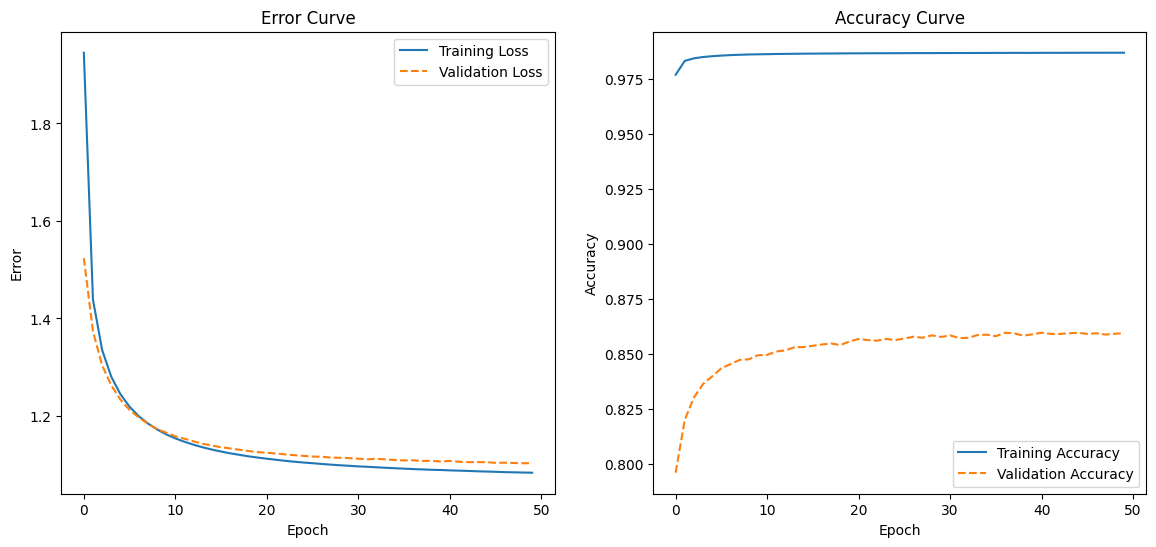

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot error curve
plt.subplot(1, 2, 1)
plt.plot(model.error_curve, label="Training Loss")
plt.plot(model.validation_loss_curve, label="Validation Loss", linestyle="--")
plt.title("Error Curve")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()

# Plot accuracy curves
plt.subplot(1, 2, 2)
plt.plot(model.accuracy_curve, label="Training Accuracy")
plt.plot(model.val_accuracy_curve, label="Validation Accuracy", linestyle="--")
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

Testing the model and make predictions  

Add confusion Matrix and F1 Score

In [31]:
predictions = model.predict(image_test_2d_lr)
cm_lr = confusion_matrix(label_test, predictions)
print("Confusion Matrix:")
print(cm_lr)
average_f1 = f1_score(label_test, predictions, average='weighted')
print(f"Average F1 Score: {average_f1:.4f}")

Confusion Matrix:
[[ 2336     5     5     8    40     0     4    29     0     4     9     3
     76    59    44    43     7    26     9     1    22     3     4    42
     26     1]
 [   29  1197     9    29    42     0     4    17     0     2     4     0
     27     5    67    12     2    26   160     0    20     0     2     4
      3    12]
 [    1    17  4228     1    36     2    30     1     2     5    12    39
      1    39   167    34     3    27    22    10    51     0     1     1
      4     8]
 [    7    23     0  1477     3     0     0     3     0    12     1     3
     12     5   385    23     6     0    42     2    28     0     0     2
      6     4]
 [   20    40   131     0  1750     3    35     6     0     4    23    26
      0    15    10    11     4    46    57     1    10     0     5     2
      2    13]
 [    4     0     1     0    23   164     3     1     0     0     1     0
      0     0     0    14     0     0     0    17     0     1     1     1
      0     0]
 [  